# Data and Sampling Distributions

## Sampling Distribution of a Statistic

In [4]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [5]:
loans_income = pd.read_csv(r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\loans_income.csv").squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

The _Python_ code uses seaborn’s FacetGrid to show the three histograms:

In [7]:
# First graph
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type': 'Data',})

# 2nd graph
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Mean of 5',
})

# 3rd graph
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

        income  type
41570  25000.0  Data
17927  70000.0  Data
2382   45000.0  Data
19839  72000.0  Data
7473   46500.0  Data


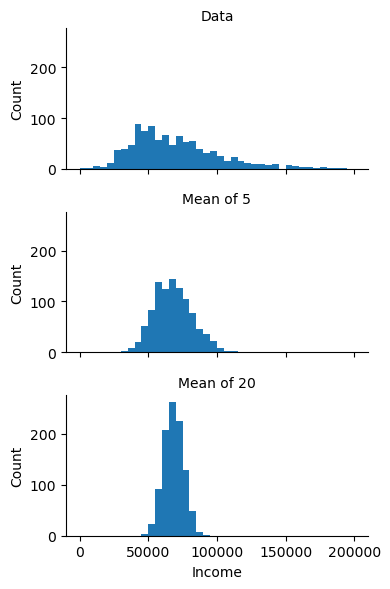

In [8]:
g=sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## The Bootstrap

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample.

The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:
1. Draw a sample value, record it, and then replace it. 
2. Repeat n times. 
3. Record the mean of the n resampled values. 
4. Repeat steps 1–3 R times. 
5. Use the R results to:
   a. Calculate their standard deviation (this estimates sample mean standard error).
   b. Produce a histogram or boxplot.
   c. Find a confidence interval.

The major Python packages don’t provide implementations of the bootstrap approach. It can be implemented using the `scikit-learn` method `resample`:

In [11]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean()-loans_income.median()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -78.63350000000355
std.error: 226.23331416966485


## Resampling vs Bootstrapping

## Confidence Intervals

68760.51844
55734.1


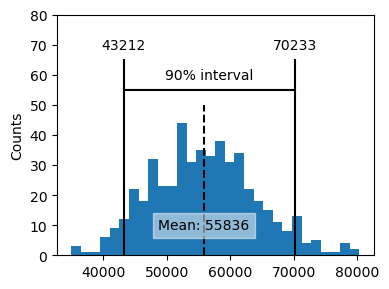

In [26]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

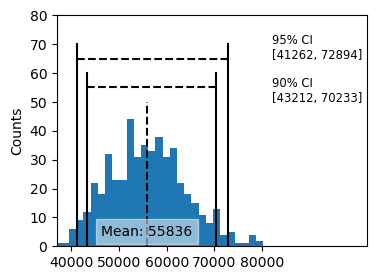

In [28]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

## Normal Distribution

## Standard Normal and QQ-Plots

A QQ-Plot is used to visually determine how close a sample is to a specified distribution—in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

In _Python_, use the method `scipy.stats.probplot` to create the QQ-Plot:

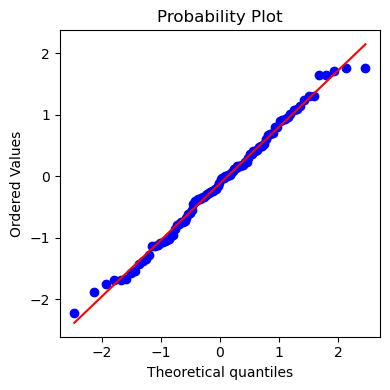

In [32]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()